# End-to-End Machine Learning Project

Note: I've cleared output on plots to save size (MB->KB)

## 2.1 Get the Data
---

### 2.1.1 Download the Data

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 2.1.2 Take a Quick Look at the Data Structure

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 2.1.3 Create a Test Set

In [8]:
import numpy as np

def split_train_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_set(housing, 0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [14]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

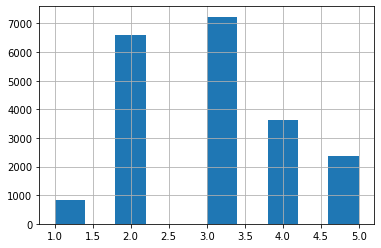

In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 2.2 Discover and Visualize the Data to Gain Insights
---

In [20]:
housing = strat_train_set.copy()

### 2.2.1 Visualizing Geographical Data

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# s = radius of each circle
# c = color
# cmap "jet" = blue (low values) to red (high values)

### 2.2.2 Looking for Correlations

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
                "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)

### 2.2.3 Experimenting with Attribute Combinations

Not useful information:
- Total number of rooms
- Total number of bedrooms
- Total population

Useful information:
- Number of rooms per household (How many rooms are in each house?)
- Number of bedrooms per room (How many of the rooms are bedrooms?)
- Population per household (How many people live in each house?)

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 2.3 Prepare the Data for Machine Learning Algorithms
---

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 2.3.1 Data Cleaning

Recall that total_bedrooms attribute has missing values.

To fix:  
1. Get rid of the corresponding districts  
2. Get rid of whole attribute  
3. Set values to some value (zero, mean, median, etc.)

In [ ]:
# housing.dropna(subset=["total_bedrooms"])   # option 1
# housing.drop("total_bedrooms", axis=1)      # option 2
# median = housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

Scikit-Learn can take care of missing values with SimpleImputer

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

You can only take median from numerical values.  
Drop the "ocean_proximity" attribute

In [27]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [28]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [31]:
X = imputer.transform(housing_num)

In [32]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                            index=housing_num.index)

### 2.3.2 Handling Text and Categorical Attributes

In [33]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Convert categorical text to numbers with Scikit-Learn's OrdinalEncoder

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

"<1H Ocean" (0) & "Near Ocean" (4) is more similar than  
"<1H Ocean" (0) & "Inland" (1)  

Use Scikit-Learn "OneHotEncoder" to create binary attribute (Inland, island, etc.) per category (ocean proximity)

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2.3.3 Custom Transformers

A custom made transformer class that adds the combined attributes

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### 2.3.4 Feature Scaling

Necessary if you have numbers in varying scales: 6-39320 total rooms vs. 0-15 median income.

1. min-max scaling (normalization): values are rescaled to range 0-1.  

Take value and subtract min value, then divide by (max minus min).  

Note: outliers can have impact. 100 vs 0-15 results to 0-0.15.  

Can use Scikit-Learn's "MinMaxScalar" with "feature_range" hyperparameter for custom ranges not 0-1.

2. standardization: mean=0 and variance=1.  

Take value subtract mean value, then divide by standard deviation. 

Note: Not bounded to a range (0-1 in mix-max scaling for example) and is not affected by outliers.  

Can use Scikit-Learn's "StandardScaler"



### 2.3.5 Transformation Pipelines

Scikit-Learn's Pipeline class can help with sequences of transformations.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Pipeline takes a list of name/estimator pairs defining a sequence of steps.  

fit()->transform() and fit_transform() calls each step sequentially, passing output of each call as parameter to next call.

In [41]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Scikit-Learn's "ColumnTransformer" can handle categorical and numerical columns in one transformer.

In [42]:
from sklearn.compose import ColumnTransformer

ColumnTransformer requires list of tuples, where each tuple contains:  
- a name
- a transformer
- and a list of names (or indices) of columns to apply transformation.

In [43]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## 2.4 Select and Train a Model
---

### 2.4.1 Training and Evaluating on the Training Set

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [45]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [46]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Predictions are way off from the labels (the true values). Let's measure the model's RMSE using Scikit-Learn's "mean_squared_error"

In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Error of $68,628 isn't very good, meaning model is underfitting (our straight line doesn't touch many of the points)

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Error=0 most likely means model is heavily overfitting the data.

### 2.4.2 Better Evaluation Using Cross-Validation

Use Scikit-Learn's "K-fold cross-validation" to:  
- randomly split training set into 10 distinct subsets called folds
- trains and evaluates model 10 times, picking a different fold every time and training on other 9 folds
- results in array containing 10 evaluation scores

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# cross_val_score computes utility functions (> better) as opposed to cost function (< better)
# (-scores) is used to represent our cost function

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68452.53946345 66879.23778372 70013.13762265 69795.81062917
 70247.9942109  74157.36606143 69652.45347889 71347.13117989
 75911.53197891 70435.88257251]
Mean: 70689.30849815239
Standard deviation: 2486.7879566828824


Now we have a better picture of the decision tree model than before (Error=0).    

Average error approx. $\$70,689 \pm 2486$, which is a lot worse than linear regression's error of $68,628.

Let's check linear regression model.

In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


Let's try using "RandomForestRegressor" model.

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [54]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18790.459704771994

In [55]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# Note: Using cv=10 (10 cross validation subsets) takes too long computing time for random forests
# I use cv=5 instead
# Standard Deviation is a bit off from textbook's: 2097, but it's probably because I have a much smaller cv set
# Mean looks right with textbook's: 50182

Scores: [49209.5736492  51187.57046849 51643.26195361 48575.63243051
 51602.36661066]
Mean: 50443.681022491844
Standard deviation: 1292.0947922810667


## 2.5 Fine-Tune Your Model
---

### 2.5.1 Grid Search

Use Scikit-Learn's "GridSearchCV" to search for hyperparameters, with inputs: hyperparameters and values to try.

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64912.247488352 {'max_features': 2, 'n_estimators': 3}
55296.781472079514 {'max_features': 2, 'n_estimators': 10}
53012.90695648102 {'max_features': 2, 'n_estimators': 30}
60198.51105425256 {'max_features': 4, 'n_estimators': 3}
52831.33622364813 {'max_features': 4, 'n_estimators': 10}
50706.87500323681 {'max_features': 4, 'n_estimators': 30}
58750.30898743663 {'max_features': 6, 'n_estimators': 3}
52244.990154901745 {'max_features': 6, 'n_estimators': 10}
50466.90416464432 {'max_features': 6, 'n_estimators': 30}
58900.72651591983 {'max_features': 8, 'n_estimators': 3}
52462.307750884014 {'max_features': 8, 'n_estimators': 10}
49936.563475113384 {'max_features': 8, 'n_estimators': 30}
62338.42582960103 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54687.88978540816 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.295901734156 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52485.33808784281 {'bootstrap': False, 'max_features': 3, 'n_estimators':

Best results is \$49,936 (max_features=8, n_estimators=30) which is slightly better than \$50,443 using default hyperparameters values.

### 2.5.2 Randomized Search

"GridSearchCV" works for small amounts of hyperparameters. When there is too many, use "RandomizedSearchCV" to evaulate a random number of combinations by selecting a random value for each hyperparameter at every iteration.  

Two main benefits:
- If there's 1000 iterations, "RandomizedSearchCV" will use 1000 different values for each hyperparameter instead of the few manually input in "GridSearchCV"

- By setting the number of iterations, you have more control of computing budget to allocate to hyperparameter search (10 iter vs 10,000 iter)

### 2.5.3 Ensemble Methods

Combine the models that perform the best.  

The group or "ensemble" will often perform better than the best individual model (Random Forests vs individual Decision Tree)

### 2.5.4 Analyze the Best Models and Their Errors

We can analyze our best model and find what the important features are.

In [60]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.97892135e-02, 6.15901230e-02, 4.31068551e-02, 1.59196401e-02,
       1.46268681e-02, 1.55851395e-02, 1.45302146e-02, 3.74048693e-01,
       5.64537643e-02, 1.09809477e-01, 6.23099783e-02, 8.24053656e-03,
       1.46819972e-01, 1.21917122e-04, 2.36861169e-03, 4.67899650e-03])

In [61]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3740486932195351, 'median_income'),
 (0.1468199716886271, 'INLAND'),
 (0.10980947665089483, 'pop_per_hhold'),
 (0.06978921346142423, 'longitude'),
 (0.06230997834258515, 'bedrooms_per_room'),
 (0.06159012302483416, 'latitude'),
 (0.05645376434445706, 'rooms_per_hhold'),
 (0.04310685507243224, 'housing_median_age'),
 (0.01591964012943931, 'total_rooms'),
 (0.015585139516724354, 'population'),
 (0.014626868118463244, 'total_bedrooms'),
 (0.01453021455595258, 'households'),
 (0.008240536557651376, '<1H OCEAN'),
 (0.004678996504447743, 'NEAR OCEAN'),
 (0.0023686116901061602, 'NEAR BAY'),
 (0.0001219171224254695, 'ISLAND')]

### 2.5.5 Evaluate Your System on the Test Set

Note: When transforming the test data, call transform() NOT fit_transform().

In [62]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48201.123000024534

Compute a 95% confidence interval using "scipy.stats.t.interval():"

In [63]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46168.42065513, 50151.50497381])

## 2.6 Launch, Monitor, and Maintain Your System
---

Now we just need to deploy it. We can save the trained Scikit-Learn model (using "joblib") including the full preproccessing and prediction pipeline, then load it in the production environment and make predictions by calling "predict()" method.

Can deploy model onto:
- A website with an API  
- A cloud like Google Cloud AI Platform  

Note: Model's need to be monitored and updated if performance drops.

Performance monitoring can take up a lot of resources and time. Automate as much as possible such as:  
- Collecting fresh data regularly and labeling it (using human raters)
- Writing script to train model and fine tune hyperparameters (runs every day/week)
- Writing script that evaluates both new model and previous model on updated test set and deploy model if performance doesn't decrease

Also remember to:
- Evaluate model's input data quality (missing features, standard dev. shifts)
- Keep regular backups

## 2.7 Try It Out!

Pick a dataset (such as from Kaggle) and try the whole process from A to Z!

## 2.8 Exercises

### 1. Try Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters:
- kernel="linear" (various values for C hyperparameter)
- kernel="rbf" (various values for C and gamma hyperparameter)

How does the best SVR predictor perform?

In [64]:
from sklearn.svm import SVR

In [ ]:
sv_reg = SVR(kernel="linear", C=3000.)
sv_reg.fit(housing_prepared, housing_labels)

housing_predictions = sv_reg.predict(housing_prepared)
sv_mse = mean_squared_error(housing_labels, housing_predictions)
sv_rmse = np.sqrt(sv_mse)
sv_rmse

In [66]:
sv_reg = SVR(kernel="rbf", C=3, gamma=3)
sv_reg.fit(housing_prepared, housing_labels)

housing_predictions = sv_reg.predict(housing_prepared)
sv_mse = mean_squared_error(housing_labels, housing_predictions)
sv_rmse = np.sqrt(sv_mse)
sv_rmse

118903.15049469989

For 'linear', looks like as C $\uparrow$, sv_rmse $\downarrow$.  
For 'rbf', doesn't look like a correlation.

Let's use a gridsearch to find the best values for the parameters.

In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000.]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]
sv_reg = SVR()
grid_search = GridSearchCV(sv_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

*Note: GridSearchCV takes a long time and 'n_jobs=-1' parameter allows computing on all available cores.*

The best SVR predictor is one with 'kernel' = 'linear' and the biggest value of 'C'.

### 2. Try replacing "GridSearchCV" with "RandomizedSearchCV"

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [71]:
param_distributions = {
    'kernel': ['linear', 'rbf'], 
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}
svm_reg = SVR()
random_search = RandomizedSearchCV(svm_reg,         param_distributions=param_distributions, n_iter=30, cv=5,
                                    scoring='neg_mean_squared_error',
                                    return_train_score=True, n_jobs=-1)
random_search.fit(housing_prepared, housing_labels)

*Note: RandomizedSearchCV takes a long time to compute.*

### 3. Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
feature_importance = sv_reg.feature_importances_
feature_importance

### 4. Try creating a single pipeline that does the full data preparation plus the final prediction.

### 5. Automatically explore some preparation options using "GridSearchCV".